# comparison to bayes from ds from scratch
This gives 101 true positives (spam classified as “spam”), 33 false positives (ham classified
as “spam”), 704 true negatives (ham classified as “ham”), and 38 false negatives
(spam classified as “ham”). This means our precision is 101 / (101 + 33) = 75%, and
our recall is 101 / (101 + 38) = 73%, which are not bad numbers for such a simple
model.

The spammiest words are “money,” “systemworks,” “rates,” “sale,” and “year,”

In [1]:
import sys
sys.path.append('/Users/niarfe/tmprepos/theseus_node')
sys.path.append('/Users/niarfe/tmprepos/theseus_node/tests')
sys.path.append('/Users/niarfe/tmprepos/hydraseq')

import theseus
import os
import data
import hydraseq as hd

In [2]:
! ls ../tests/data/iris
! cd ../tests/data/iris; wc -l iris_data.csv
seto, virg, vers = [], [], []
full = []
hydrav = []
with open('../tests/data/iris/iris_data.csv', 'r') as source:
    for line in source:
        arr = {
            'Iris-setosa':     seto,
            'Iris-versicolor': vers,
            'Iris-virginica':  virg
        }[line.split(',')[-1].strip()]
        arr.append([f+m for m, f in zip(line.split(',')[:-1], ['a','b','c','d'])])
        full.append([f+m for m, f in zip(line.split(',')[:-1], ['a','b','c','d'])])
        hydrav.append([e.strip() for e in line.split(',')])

print('done')

iris_data.1.csv iris_data.csv
     149 iris_data.csv
done


In [3]:
n_seto = theseus.Node(seto)
n_virg = theseus.Node(virg)
n_vers = theseus.Node(vers)
n_back = theseus.Node(seto + vers + virg)
print('done')

done


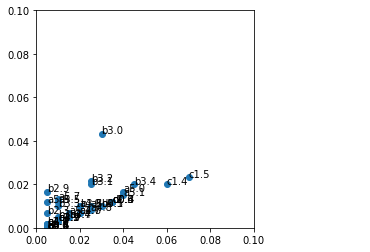

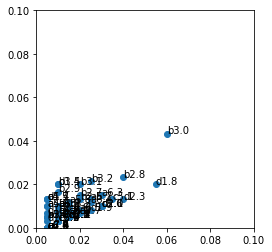

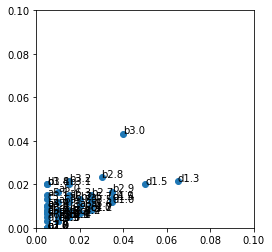

In [4]:
n_seto.visualize(n_back, cutoff=100, magnification=10)
n_virg.visualize(n_back, cutoff=100, magnification=10)
n_vers.visualize(n_back, cutoff=100, magnification=10)

In [36]:
ratio = 0.5
f_seto = n_seto.create_profile(n_back, ratio=ratio)
f_virg = n_virg.create_profile(n_back, ratio=ratio)
f_vers = n_vers.create_profile(n_back, ratio=ratio)
# The spammiest words are “money,” “systemworks,” “rates,” “sale,” and “year,”
print("top seto: ", "|".join(f_seto[:15]))
print("top virg: ", "|".join(f_virg[:15]))
print("top vers: ", "|".join(f_vers[:15]))

top seto:  d0.2|c1.5|c1.4|b3.4|a5.1|a5.0|c1.3|d0.4|d0.3|c1.6|b3.5|d0.1|a5.4|a4.8|a4.9
top virg:  d1.8|d2.3|c5.1|a6.3|d2.1|c5.6|d2.0|d1.9|a6.4|a6.5|a7.7|d2.5|c5.8|d2.2|a7.2
top vers:  d1.3|d1.5|d1.4|c4.5|d1.0|b2.9|c4.7|a5.5|c4.0|a5.6|d1.2|c4.2|a6.0|a6.1|c4.4


In [41]:
# print("starting")
cutoff =1
depth = 100

ratio = 0.9
n_standard = n_back
raw_lists = seto + vers + virg
print("Len background lists: ", len(raw_lists))
arr = [[],[],[]]
itr = 0
allhits = []
for node in [n_seto, n_virg, n_vers]:
    node.create_profile(n_standard, ratio=ratio)
    hits = []
    which = []
    for cutoff in range(2,5):
        node.cutoff = cutoff
        hits.append(sum([1 for sentence in raw_lists if node.predict(sentence[:])]))
        which.append("".join(['#' if node.predict(sentence[:]) else '-' for sentence in raw_lists]))
    #print(hits)
    allhits.append(hits)
    #print(which)
    arr[itr] = which
    itr += 1

print(allhits)
with open('res.csv', 'w') as target:
    for idx in range(len(arr[0][0])):
        target.write(" ".join([arr[0][0][idx], arr[1][0][idx], arr[2][0][idx], str(raw_lists[idx]), "\n"]))
! code res.csv

Len background lists:  150
[[50, 50, 35], [64, 51, 33], [64, 49, 24]]


In [8]:
#%%time
# Populate the main hydra with EEEEEEverything!
hdr = hd.Hydraseq('')
print("total sentences ", len(hydrav))
#[hdr.full_insert(sentence) for sentence in background]
for row in hydrav:
    hdr.insert(" ".join(row))
len(hdr.columns)

total sentences  150


77

In [9]:
print(hdr.reset().next_nodes)
print()
for n in hdr.reset().next_nodes:
    print(n, n.nexts)

[6.7, 6.9, 5.9, 7.1, 5.3, 7.7, 5.7, 7.3, 6.8, 5.0, 5.8, 6.0, 5.1, 4.9, 6.6, 4.8, 4.4, 6.5, 7.0, 4.3, 6.1, 5.2, 7.2, 7.4, 6.2, 5.5, 5.4, 7.6, 6.4, 5.6, 7.9, 4.5, 6.3, 4.6, 4.7]

6.7 [3.0, 3.3, 3.1, 2.5]
6.9 [3.1, 3.2]
5.9 [3.0, 3.2]
7.1 [3.0]
5.3 [3.7]
7.7 [3.8, 3.0, 2.6, 2.8]
5.7 [4.4, 2.9, 2.5, 3.8, 2.6, 3.0, 2.8]
7.3 [2.9]
6.8 [3.0, 2.8, 3.2]
5.0 [2.3, 3.0, 3.6, 2.0, 3.3, 3.4, 3.2, 3.5]
5.8 [2.7, 2.6, 2.8, 4.0]
6.0 [2.2, 2.7, 2.9, 3.0, 3.4]
5.1 [3.7, 3.4, 3.8, 3.3, 2.5, 3.5]
4.9 [3.0, 2.5, 2.4, 3.1]
6.6 [2.9, 3.0]
4.8 [3.4, 3.1, 3.0]
4.4 [3.0, 2.9, 3.2]
6.5 [2.8, 3.0, 3.2]
7.0 [3.2]
4.3 [3.0]
6.1 [2.6, 3.0, 2.8, 2.9]
5.2 [3.5, 4.1, 2.7, 3.4]
7.2 [3.2, 3.6, 3.0]
7.4 [2.8]
6.2 [3.4, 2.8, 2.9, 2.2]
5.5 [2.3, 2.4, 2.6, 3.5, 2.5, 4.2]
5.4 [3.9, 3.4, 3.7, 3.0]
7.6 [3.0]
6.4 [3.2, 3.1, 2.9, 2.7, 2.8]
5.6 [3.0, 2.9, 2.5, 2.7, 2.8]
7.9 [3.8]
4.5 [2.3]
6.3 [2.5, 2.7, 2.9, 3.4, 2.3, 3.3, 2.8]
4.6 [3.1, 3.6, 3.2, 3.4]
4.7 [3.2]


In [10]:
idx_elem = 10
sentence = " ".join(background[idx_elem])
print(sentence)
print('---------------------------------------------------')

print(hdr.to_hydra_rep(sentence))

def group_to_hydra_rep(group):
    return [hdr.to_hydra_rep(sentence) for sentence in group]

h_background =  group_to_hydra_rep(background)
h_spam =        group_to_hydra_rep(spam)
h_easy_ham =    group_to_hydra_rep(easy_ham)
h_hard_ham =    group_to_hydra_rep(hard_ham)
print(h_spam)

NameError: name 'background' is not defined

In [ ]:
n_h_background = theseus.Node(h_background)
n_h_spam = theseus.Node(h_spam)
n_h_easy_ham = theseus.Node(h_easy_ham)
n_h_hard_ham = theseus.Node(h_hard_ham)

In [ ]:
cutoff = 1
depth = 100
target = f_spam
theseus.node.count_hits(spam,     target, cutoff, depth)
theseus.node.count_hits(hard_ham, target, cutoff, depth)
theseus.node.count_hits(easy_ham, target, cutoff, depth);

In [ ]:
theseus.node.visualize(n_easy_ham, n_background, axis_lims=(0.0, 1.0), magnification=10.0)

In [ ]:

def get_spiral_dots(node1, node2, ratio):
    x, y, keys = theseus.node.create_xy_table(node1, node2, cutoff1=100, cutoff2=100, ratio=ratio)
    #print(len(x), len(y), len(keys))
    cles = []
    for row in zip(keys, zip(x, y)):
        if row[1][1] != 0:
            #print(row)
            cles.append(row[0])
        else:
            cles.append(row[0])
            #print("bad row ", row)
    return cles

ratio = 0.9
spam_list = get_spiral_dots(n_h_spam,     n_h_background, ratio)
easy_list = get_spiral_dots(n_h_easy_ham, n_h_background, ratio)
hard_list = get_spiral_dots(n_h_hard_ham, n_h_background, ratio)

def new_count_hits(group, lst, thold):
    """group list<list<str>> lst list, thold int"""
    hits = 0
    for sentence in group:
        score = len(set(sentence) & set(lst))
        if score > thold:
            hits += 1
    return hits

print("background", len(h_background))
print("totals ", len(h_spam), len(h_easy_ham), len(h_hard_ham))
thold = 4
target = spam_list
spamers  = new_count_hits(h_spam,     target, thold)
easyhams = new_count_hits(h_easy_ham, target, thold)
hardhams = new_count_hits(h_hard_ham, target, thold)
print("hits   ",spamers, easyhams, hardhams)